In [21]:
# Librerías principales
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import datetime 
import statsmodels.api as sm
from sklearn import metrics

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
# from factor_analyzer import FactorAnalyzer # Ánalisis factorial
from scipy.stats import bartlett
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
import multiprocessing
# from regressors import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import tree
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder


import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller, kpss

In [22]:
df = pd.read_csv(r'RES_CORR_2.csv')
df=df.dropna()
#df= df.dropna(subset = ['DETECTED_CATEGORY'], inplace=True)
df_Original=df

In [23]:
df

,FECHA,REFERENCIA,VENTAS,RETURNS,DETECTED_CATEGORY,COUNT_IMPRESSIONS,AVG_IMPRESIONS
5,2021-01-05,LTR-21111,23,12,NO_USE_CONTEXT,1695.0,0.174580
6,2021-01-05,LTR-21111,23,12,USE_DEPORTIVA_PER,11.0,0.001133
7,2021-01-05,LTR-21111,23,12,USE_DIARIO_PER,818.0,0.084252
8,2021-01-05,LTR-21111,23,12,USE_P_PARTO_PER,362.0,0.037285
9,2021-01-05,LTR-21111,23,12,USE_P_QUIRURGICA_PER,5663.0,0.583273
...,...,...,...,...,...,...,...
7313,2021-10-31,SON-053ZL,15,6,USE_P_QUIRURGICA_PER,16512.0,0.386463
7315,2021-11-01,SON-053ZL,25,3,NO_USE_CONTEXT,8617.0,0.200862
7316,2021-11-01,SON-053ZL,25,3,USE_DIARIO_PER,14673.0,0.342028
7317,2021-11-01,SON-053ZL,25,3,USE_P_PARTO_PER,393.0,0.009161


# Portafolio optimo para minimo returns por Referencia

In [24]:
#df = pd.read_csv(r'RES_CORR_2.csv')


df = pd.read_csv(r'RES_CORR_2.csv')
df=df.dropna()
#df= df.dropna(subset = ['DETECTED_CATEGORY'], inplace=True)
df_Original=df

df['formatted_date'] = pd.to_datetime(df['FECHA'])
df['day_of_year'] = df.formatted_date.apply(lambda x: x.dayofyear)
df['Semana'] = df.formatted_date.apply(lambda x: x.weekofyear)




Y=pd.pivot_table(df_Original.iloc[:, :], index=["Semana","REFERENCIA"], values=["VENTAS","RETURNS"],
                 aggfunc={"VENTAS":np.sum,"RETURNS":np.sum}) 

Y.reset_index(inplace=True)

Y["RETURN_MEAN"]=Y["RETURNS"]/Y["VENTAS"]


Y2=pd.pivot_table(df_Original.iloc[:, :], index=["Semana","REFERENCIA","DETECTED_CATEGORY"], values=["COUNT_IMPRESSIONS"],
                 aggfunc={"COUNT_IMPRESSIONS":np.sum}) 



Y2.reset_index(inplace=True)


jmm=list(Y2["Semana"].unique())
jmm2=list(Y2["DETECTED_CATEGORY"].unique())
nuevo=[]
jmm3=list(Y2["REFERENCIA"].unique())

for z in range(len(jmm3)):
    for i in range(len(jmm)):
        temp=Y2.loc[(Y2["Semana"]==jmm[i]) & (Y2["REFERENCIA"]==jmm3[z])]
        suma=float(temp["COUNT_IMPRESSIONS"].sum())
        for j in range(len(jmm2)):
            temp2=temp.loc[temp["DETECTED_CATEGORY"]==jmm2[j]]
            if len(temp2)>0:
                x=temp2.iloc[0][-1]
                y=x/suma
                nuevo.append(y)
        
        
Y2["AVG"]=nuevo



dataframes=[]
dataframes2=[]

referencias= list(df["REFERENCIA"].unique())

for z in range(len(referencias)):

    xd=Y.loc[Y["REFERENCIA"]==referencias[z]]
    
              
    filas= list(xd["Semana"].unique())
    categoria=list(Y2["DETECTED_CATEGORY"].unique())

    yf = pd.DataFrame()
    yf1 = pd.DataFrame()
    
    ref=[]
    
    
    
    x=[[],[],[],[],[]]

    y=[]
    y2=[]
    
    

    for i in range(len(filas)-2):
        temp=xd.loc[xd["Semana"]==filas[i]]
        y.append(temp.iloc[0][-1])
        ref.append(referencias[z])
        y2.append(temp.iloc[0][-2])
        
        
        
        for j in range(len(categoria)):
            temp2=Y2.loc[(Y2["DETECTED_CATEGORY"]==categoria[j]) & (Y2["Semana"]==filas[i])]
            if len(temp2) == 0:
                x[j].append(0)
            
            else:
                x[j].append(temp2.iloc[0][-1])




    yf["Referencia"]=ref
    #yf["No info"]=x[0]
    yf["NO_USE_CONTEXT"]=x[0]
    yf["USE_DEPORTIVA_PER"]=x[1]
    yf["USE_DIARIO_PER"]=x[2]
    yf["USE_P_PARTO_PER"]=x[3]
    yf["USE_P_QUIRURGICA_PER"]=x[4]
    yf["RETURN_MEAN"]=y

    dataframes.append(yf)
    
    #yf1["No info"]=x[0]
    yf1["Referencia"]=ref
    yf1["NO_USE_CONTEXT"]=x[0]
    yf1["USE_DEPORTIVA_PER"]=x[1]
    yf1["USE_DIARIO_PER"]=x[2]
    yf1["USE_P_PARTO_PER"]=x[3]
    yf1["USE_P_QUIRURGICA_PER"]=x[4]
    yf1["Ventas"]=y2

    dataframes2.append(yf1)

# Prediccion de ventas usando variables dummies

In [25]:
sales_all_datasets = pd.concat(dataframes2)
df_sales_dummies = pd.get_dummies(sales_all_datasets, columns=['Referencia'])
df_sales_dummies.head()

,NO_USE_CONTEXT,USE_DEPORTIVA_PER,USE_DIARIO_PER,USE_P_PARTO_PER,USE_P_QUIRURGICA_PER,Ventas,Referencia_LTR-21111,Referencia_LTR-21113,Referencia_SON-053ZL,Referencia_SON-066BF,Referencia_SON-PS-066
0,0.160956,0.000531,0.082251,0.087313,0.668948,552,1,0,0,0,0
1,0.000979,0.082690,0.341514,0.377120,0.285757,727,1,0,0,0,0
2,0.001991,0.082692,0.214111,0.509924,0.238854,678,1,0,0,0,0
3,0.218042,0.439991,0.439763,0.001245,0.010863,359,1,0,0,0,0
4,0.053627,0.158943,0.717466,0.000405,0.027714,357,1,0,0,0,0


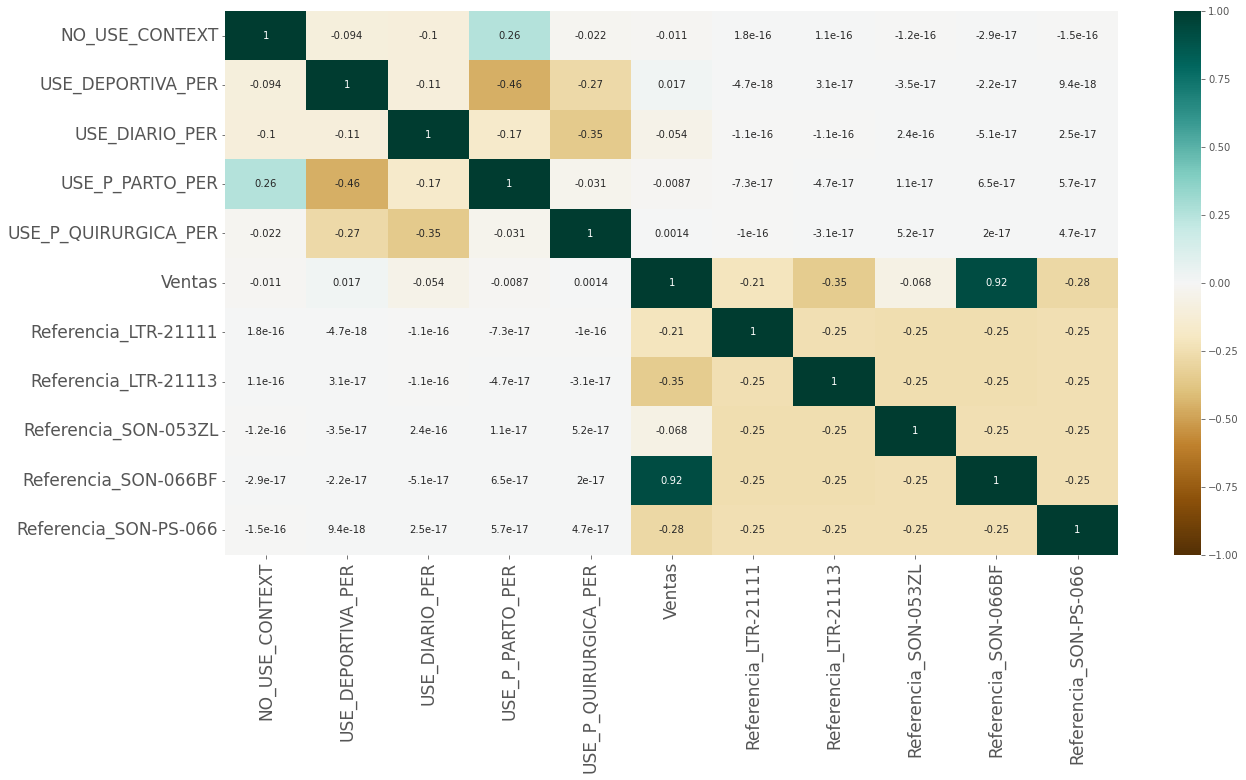

In [26]:
correlation_mat = df_sales_dummies.corr()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
g=sns.heatmap(correlation_mat, annot = True, vmin=-1, vmax=1, cmap="BrBG")
g.set_yticklabels(g.get_ymajorticklabels(), size = 17)
g.set_xticklabels(g.get_xmajorticklabels(), size = 17, rotation=90)
plt.show()

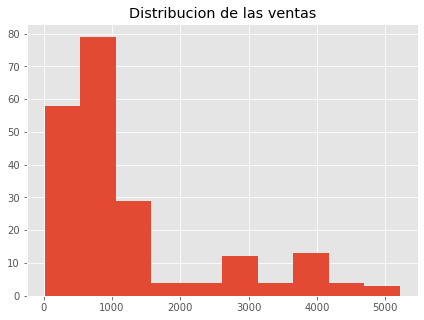

In [27]:
plt.figure(figsize=(7,5))
plt.title("Distribucion de las ventas")
plt.hist(df_sales_dummies["Ventas"])
plt.show()

In [28]:
def nested_cross_validation(models, X, y, scoring, outer_n_splits=10, inner_n_splits=5, random_state=555):
    all_results = pd.DataFrame()
    convert_negative_metrics_function = lambda k,v: (k.replace("neg_", ""), -v) if "_neg_" in k else (k,v)
    cv_inner = KFold(n_splits=inner_n_splits, shuffle=True, random_state=random_state)
    cv_outer = KFold(n_splits=outer_n_splits, shuffle=True, random_state=random_state)
    for model in models:
        search_model = RandomizedSearchCV(model["model"], model["hyperparams_space"], scoring="neg_mean_absolute_error", 
                                          cv=cv_inner, n_jobs=-1, refit=True, random_state=random_state)
        results = cross_validate(model["model"], X, y, scoring = scoring, cv=cv_outer)
        # Get metrics from results dict
        result_metrics = {k:v for k,v in results.items() if "test" in k}
        # Convert negative metrics such as neg_mean_squared_error and neg_mean_absolute_error
        result_metrics = dict(convert_negative_metrics_function(k, v) for k,v in result_metrics.items())
        # Helper dict to create a dataframe at the end
        result_metrics_df = dict(model_name=model["model"].__class__.__name__)
        # Save only mean and std from results metrics
        for metric_name, values in result_metrics.items():
            metric_name = metric_name.replace("test_", "")
            result_metrics_df[metric_name + "_mean"] = np.mean(values), 
            result_metrics_df[metric_name + "_std"] = np.std(values)
            if "mse" == metric_name:
                result_metrics_df["rmse_mean"] = np.mean(np.sqrt(values)) 
                result_metrics_df["rmse_std"] = np.std(np.sqrt(values))
        all_results = pd.concat([all_results, pd.DataFrame(result_metrics_df)])
    return all_results.set_index("model_name")

In [29]:
scoring = {"r2": "r2", 
           "explained_variance": "explained_variance",
           "neg_mse": "neg_mean_squared_error",
           "neg_mae": "neg_mean_absolute_error"
          }
random_state = 555
forest_model = dict(model=RandomForestRegressor(), 
                    hyperparams_space=dict(n_estimators = [10, 100, 300],
                                           max_features= [2, 4, 6], 
                                           max_depth=[int(x) for x in np.linspace(2, 50, num = 10)]
                                          )
) 



lasso_model = dict(model=Lasso(), hyperparams_space=dict(alpha = np.linspace(0, 1, 20)))
ridge_model = dict(model=Ridge(), hyperparams_space=dict(alpha = np.linspace(0, 1, 20)))
svr_model = dict(model=SVR(), hyperparams_space = {
    'kernel': ['rbf'],
    'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
    'C': [1, 10, 100, 1000, 10000]})
xgb_model = dict(model=xgb.XGBRegressor(), hyperparams_space= {
    "n_estimators":[int(x) for x in np.linspace(start = 100, stop = 500, num = 10)],
    "max_depth": [int(x) for x in np.linspace(10, 110, num = 10)],
    "eta":[x for x in np.linspace(0, 1, num = 10)],
    "max_leaves": [int(x) for x in np.linspace(0, 110, num = 10)],
    
    
    
})

In [30]:
X = df_sales_dummies.drop(columns=["Ventas"])
y = df_sales_dummies["Ventas"]
nested_cross_validation([forest_model, lasso_model, ridge_model, xgb_model], X, y, scoring).T

model_name,RandomForestRegressor,Lasso,Ridge,XGBRegressor
r2_mean,0.852928,0.845348,0.846941,0.850773
r2_std,0.056867,0.057691,0.051301,0.063332
explained_variance_mean,0.857114,0.850053,0.851563,0.860858
explained_variance_std,0.055932,0.056897,0.050137,0.058917
mse_mean,188371.576979,198296.473634,199258.660886,194162.844975
mse_std,62302.814051,70343.385897,71344.456477,81431.379470
rmse_mean,428.421144,438.778262,439.857401,431.587361
rmse_std,69.475899,75.961243,76.053452,88.854908
mae_mean,306.469810,319.011998,320.337457,308.709901
mae_std,43.711556,55.579125,56.837456,57.625202


# Prediccion de ventas usando variables dummies incluyendo la semana


In [31]:
dataframes2_with_week = [df.reset_index().rename(columns={"index": "week"}) for df in dataframes2]
sales_with_week = pd.concat(dataframes2_with_week)
sales_with_week_dummies = pd.get_dummies(sales_with_week, columns=['Referencia'])
sales_with_week_dummies["week"] = sales_with_week_dummies["week"] + 1
sales_with_week_dummies.head()

,week,NO_USE_CONTEXT,USE_DEPORTIVA_PER,USE_DIARIO_PER,USE_P_PARTO_PER,USE_P_QUIRURGICA_PER,Ventas,Referencia_LTR-21111,Referencia_LTR-21113,Referencia_SON-053ZL,Referencia_SON-066BF,Referencia_SON-PS-066
0,1,0.160956,0.000531,0.082251,0.087313,0.668948,552,1,0,0,0,0
1,2,0.000979,0.082690,0.341514,0.377120,0.285757,727,1,0,0,0,0
2,3,0.001991,0.082692,0.214111,0.509924,0.238854,678,1,0,0,0,0
3,4,0.218042,0.439991,0.439763,0.001245,0.010863,359,1,0,0,0,0
4,5,0.053627,0.158943,0.717466,0.000405,0.027714,357,1,0,0,0,0


In [32]:
X = sales_with_week_dummies.drop(columns=["Ventas"])
y = sales_with_week_dummies["Ventas"]
nested_cross_validation([forest_model, lasso_model, ridge_model, xgb_model], X, y, scoring).T

model_name,RandomForestRegressor,Lasso,Ridge,XGBRegressor
r2_mean,0.928992,0.845249,0.847619,0.919631
r2_std,0.033274,0.058130,0.051890,0.032220
explained_variance_mean,0.933228,0.849762,0.852033,0.926265
explained_variance_std,0.029678,0.056928,0.050458,0.029550
mse_mean,92930.727219,197224.640586,197346.416262,108205.959562
mse_std,51684.375613,67898.636160,69165.656678,50521.122641
rmse_mean,295.548405,437.729803,437.800256,320.380577
rmse_std,74.711895,74.948383,75.348208,74.580462
mae_mean,206.168143,321.935810,322.814858,209.398852
mae_std,46.889996,49.604114,51.382016,37.539151


## Conclusion
Es posible observar que el mejor modelo es el random forest pues si bien tiene ligeramente una mayor desviación estándar en las métricas que el XGBRegressor, esto se compensa por tener un mayor promedio en las métricas.
También es evidente que estos modelos son muchos más poderosos usando la variable de semana del año, lo cual puede indicar que el modelo está aprendiendo patrones de las ventas que dependen de la temporada en la que se está

##  Optimizacion de hiperparametros
Si bien dentro del proceso de optimización de doble validación cruzada se realiza en una parte interna optimización de hiperparámetros, esto se hace para cada uno de los k folds exteriores. Así pues, ahora que sabemos que el **RandomForestRegressor** se comporta bien generalizando nuevos datos, podemos proceder a hacer optimizacion de hiperparámetros en el conjunto completo de los datos.

In [33]:
cv_inner = KFold(n_splits=10, shuffle=True, random_state=random_state)
search = RandomizedSearchCV(forest_model["model"], forest_model["hyperparams_space"], scoring="r2", 
                                          cv=cv_inner, n_jobs=-1, refit=True, random_state=random_state)
result = search.fit(X, y)
print('Best R2: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
best_model_sales = result.best_estimator_

Best R2: 0.9219257985253876
Best Hyperparameters: {'n_estimators': 100, 'max_features': 6, 'max_depth': 50}


# Prediccion de devoluciones usando variables dummies

In [34]:
devoluciones_all_datasets = pd.concat(dataframes)
df_devoluciones_dummies = pd.get_dummies(devoluciones_all_datasets, columns=['Referencia'])
df_devoluciones_dummies.head()

,NO_USE_CONTEXT,USE_DEPORTIVA_PER,USE_DIARIO_PER,USE_P_PARTO_PER,USE_P_QUIRURGICA_PER,RETURN_MEAN,Referencia_LTR-21111,Referencia_LTR-21113,Referencia_SON-053ZL,Referencia_SON-066BF,Referencia_SON-PS-066
0,0.160956,0.000531,0.082251,0.087313,0.668948,0.422101,1,0,0,0,0
1,0.000979,0.082690,0.341514,0.377120,0.285757,0.368638,1,0,0,0,0
2,0.001991,0.082692,0.214111,0.509924,0.238854,0.311209,1,0,0,0,0
3,0.218042,0.439991,0.439763,0.001245,0.010863,0.481894,1,0,0,0,0
4,0.053627,0.158943,0.717466,0.000405,0.027714,0.274510,1,0,0,0,0


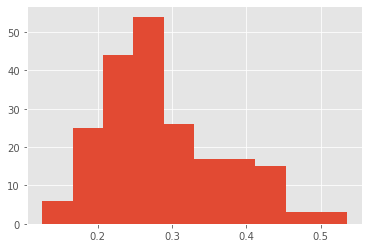

In [35]:
plt.hist(df_devoluciones_dummies["RETURN_MEAN"])
plt.show()

In [36]:
X = df_devoluciones_dummies.drop(columns=["RETURN_MEAN"])
y = df_devoluciones_dummies["RETURN_MEAN"]
nested_cross_validation([forest_model, lasso_model, ridge_model, xgb_model], X, y, scoring).T

model_name,RandomForestRegressor,Lasso,Ridge,XGBRegressor
r2_mean,0.464501,-4.023173e-02,0.587662,0.373790
r2_std,0.202974,4.382956e-02,0.127961,0.240572
explained_variance_mean,0.510522,-6.661338e-17,0.624996,0.422170
explained_variance_std,0.185121,1.734224e-16,0.119656,0.193102
mse_mean,0.003201,6.582733e-03,0.002512,0.003722
mse_std,0.000777,1.318472e-03,0.000590,0.000887
rmse_mean,0.056169,8.066430e-02,0.049780,0.060556
rmse_std,0.006750,8.718047e-03,0.005862,0.007444
mae_mean,0.042708,6.544770e-02,0.036533,0.045765
mae_std,0.004549,8.030243e-03,0.004765,0.004887


In [37]:
model

model_name,RandomForestRegressor,Lasso,Ridge,XGBRegressor
r2_mean,0.462634,-4.023173e-02,0.587662,0.373790
r2_std,0.202755,4.382956e-02,0.127961,0.240572
explained_variance_mean,0.511765,-6.661338e-17,0.624996,0.422170
explained_variance_std,0.177580,1.734224e-16,0.119656,0.193102
mse_mean,0.003211,6.582733e-03,0.002512,0.003722
mse_std,0.000761,1.318472e-03,0.000590,0.000887
rmse_mean,0.056293,8.066430e-02,0.049780,0.060556
rmse_std,0.006496,8.718047e-03,0.005862,0.007444
mae_mean,0.042726,6.544770e-02,0.036533,0.045765
mae_std,0.004131,8.030243e-03,0.004765,0.004887


# Modelo de optimizacion para minimizar los retornos

In [53]:
def constraint(x):
    Const=1
    return Const-sum(x)


def objective(x):
    
    d1=[x[0]]
    d2=[x[1]]
    d3=[x[2]]
    d4=[x[3]]
    d5=[x[4]]
    #d6=[x[5]]
    
    val = pd.DataFrame()
    val["X1"]=d1
    val["X2"]=d2
    val["X3"]=d3
    val["X4"]=d4
    val["X5"]=d5
    val["X6"]=listas[i][0]
    val["X7"]=listas[i][1]
    val["X8"]=listas[i][2]
    val["X9"]=listas[i][3]
    val["X10"]=listas[i][4]
    
    y_est= model.predict(val)
    y=list(y_est)[0]
    return(y)


In [43]:
listas=[[[1],[0],[0],[0],[0]],[[0],[1],[0],[0],[0]], [[0],[0],[1],[0],[0]],   [[0],[0],[0],[1],[0]] , [[0],[0],[0],[0],[1]]  ]

In [66]:
from sklearn import svm
import scipy
import random
from scipy.optimize import minimize
import random



model=RandomForestRegressor(n_estimators= 100, max_features = 6, max_depth= 50) 
X = df_devoluciones_dummies.drop(columns=["RETURN_MEAN"])
y = df_devoluciones_dummies["RETURN_MEAN"]
model.fit(X,y)

referencias=["LTR-21111","LTR-21113","SON-053ZL","SON-066BF","SON-PS-066"]
for i in range(5):
    
    b=(0,1)
    bnds=(b,b,b,b,b)
    con1={"type":"eq","fun":constraint}
    
    porc=[]
    valor=[]
    for j in range(10000):
    
        x0=[random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1)]
        sol= minimize(objective,x0,method="SLSQP",bounds=bnds,constraints=con1,options= {"maxiter":1000})
        pesos =list(sol.x)
        devol= objective(pesos)
        
        porc.append(pesos)
        valor.append(devol)
        
    minimo=min(valor)
    
    index= valor.index(minimo)
    
    print("Returns minimas para",referencias[i], minimo, "portafolio")
    print(porc[index])
                
        
        

Returns minimas para LTR-21111 0.26194639288258065 portafolio
[0.38649119898081596, 0.08088543131663972, 0.0, 5.551115123125783e-17, 0.5326233697025442]
Returns minimas para LTR-21113 0.32134420901171296 portafolio
[0.03968103917097354, 0.5226245540392607, 1.6653345369377348e-16, 5.551115123125783e-17, 0.4376944067897657]
Returns minimas para SON-053ZL 0.17547418622072833 portafolio
[0.4822455905802637, 0.05972210424929203, 0.24038333781390536, 0.003435458248622958, 0.21421350910791598]
Returns minimas para SON-066BF 0.21657254772521753 portafolio
[0.35036315996468204, 0.0014974968257208676, 0.0, 0.0, 0.6481393432095971]
Returns minimas para SON-PS-066 0.20248633628403545 portafolio
[0.0, 0.07970658121952004, 0.21678587125197607, 0.486755905502819, 0.21675164202568498]


In [74]:
devoluciones_df = pd.concat(dataframes)
sales_df = pd.concat(dataframes2)
full_df = devoluciones_df.merge(sales_df)
mean_by_reference = full_df.groupby("Referencia")[["RETURN_MEAN", "Ventas"]].mean()


In [75]:
mean_by_reference

,RETURN_MEAN,Ventas
Referencia,,
LTR-21111,0.323191,727.452381
LTR-21113,0.391161,404.238095
SON-053ZL,0.204318,1084.071429
SON-066BF,0.240202,3477.190476
SON-PS-066,0.274030,557.666667


In [ ]:
X = df_sales_dummies.drop(columns=["Ventas"])
y = df_sales_dummies["Ventas"]
model=RandomForestRegressor(n_estimators= 100, max_features = 6, max_depth= 50) 
model.fit(X,y)

In [78]:
optimos=[[0.38649119898081596, 0.08088543131663972, 0.0, 5.551115123125783e-17, 0.5326233697025442],
        [0.03968103917097354, 0.5226245540392607, 1.6653345369377348e-16, 5.551115123125783e-17, 0.4376944067897657],
        [0.4822455905802637, 0.05972210424929203, 0.24038333781390536, 0.003435458248622958, 0.21421350910791598],
        [0.35036315996468204, 0.0014974968257208676, 0.0, 0.0, 0.6481393432095971],
        [0.0, 0.07970658121952004, 0.21678587125197607, 0.486755905502819, 0.21675164202568498]]

In [80]:
for i in range(5):
    x=optimos[i]
    d1=[x[0]]
    d2=[x[1]]
    d3=[x[2]]
    d4=[x[3]]
    d5=[x[4]]
    #d6=[x[5]]

    val = pd.DataFrame()
    val["X1"]=d1
    val["X2"]=d2
    val["X3"]=d3
    val["X4"]=d4
    val["X5"]=d5
    val["X6"]=listas[i][0]
    val["X7"]=listas[i][1]
    val["X8"]=listas[i][2]
    val["X9"]=listas[i][3]
    val["X10"]=listas[i][4]
    y_est= model.predict(val)
    
    print("Ventas para la referencia",referencias[i],"son",y_est)
    

Ventas para la referencia LTR-21111 son [1144.73]
Ventas para la referencia LTR-21113 son [441.93]
Ventas para la referencia SON-053ZL son [1100.65]
Ventas para la referencia SON-066BF son [3129.71]
Ventas para la referencia SON-PS-066 son [295.63]


# Prediccion de devoluciones usando variables dummies y week

In [14]:
dataframes_with_week = [df.reset_index().rename(columns={"index": "week"}) for df in dataframes]
devoluciones_with_week = pd.concat(dataframes_with_week)
devoluciones_with_week_dummies = pd.get_dummies(devoluciones_with_week, columns=['Referencia'])
devoluciones_with_week_dummies["week"] = devoluciones_with_week_dummies["week"] + 1
devoluciones_with_week_dummies.head()

,week,NO_USE_CONTEXT,USE_DEPORTIVA_PER,USE_DIARIO_PER,USE_P_PARTO_PER,USE_P_QUIRURGICA_PER,RETURN_MEAN,Referencia_LTR-21111,Referencia_LTR-21113,Referencia_SON-053ZL,Referencia_SON-066BF,Referencia_SON-PS-066
0,1,0.160956,0.000531,0.082251,0.087313,0.668948,0.422101,1,0,0,0,0
1,2,0.000979,0.082690,0.341514,0.377120,0.285757,0.368638,1,0,0,0,0
2,3,0.001991,0.082692,0.214111,0.509924,0.238854,0.311209,1,0,0,0,0
3,4,0.218042,0.439991,0.439763,0.001245,0.010863,0.481894,1,0,0,0,0
4,5,0.053627,0.158943,0.717466,0.000405,0.027714,0.274510,1,0,0,0,0


In [15]:
X = devoluciones_with_week_dummies.drop(columns=["RETURN_MEAN"])
y = devoluciones_with_week_dummies["RETURN_MEAN"]
nested_cross_validation([forest_model, lasso_model, ridge_model, xgb_model], X, y, scoring).T

model_name,RandomForestRegressor,Lasso,Ridge,XGBRegressor
r2_mean,0.619150,-4.023173e-02,0.594129,0.593874
r2_std,0.139309,4.382956e-02,0.133353,0.163109
explained_variance_mean,0.630838,-6.661338e-17,0.630266,0.610259
explained_variance_std,0.138661,1.734224e-16,0.118706,0.169500
mse_mean,0.002303,6.582733e-03,0.002458,0.002478
mse_std,0.000767,1.318472e-03,0.000569,0.001043
rmse_mean,0.047385,8.066430e-02,0.049261,0.048923
rmse_std,0.007595,8.718047e-03,0.005636,0.009208
mae_mean,0.034746,6.544770e-02,0.036602,0.037676
mae_std,0.005363,8.030243e-03,0.004789,0.007992


## Conclusión
* Se puede observar que se logra un mejor rendimiento incluyendo la variable de la semana del año pues hay un incremento aproximadamente de 0.15 por ejemplo en r2 con este último enfoque además que se estabiliza más el modelo reduciendo la desviación estándar de los mismos.
* También se ve que a Lasso le va muy mal en comparación de los otros modelos.
* Finalmente el mejor modelo para predecir devoluciones vuelve a ser una vez más el random forest regressor

##  Optimizacion de hiperparametros
Si bien dentro del proceso de optimización de doble validación cruzada se realiza en una parte interna optimización de hiperparámetros, esto se hace para cada uno de los k folds exteriores. Así pues, ahora que sabemos que el RandomForestRegressor se comporta bien generalizando nuevos datos, podemos proceder a hacer optimizacion de hiperparámetros en el conjunto completo de los datos.

In [16]:
cv_inner = KFold(n_splits=10, shuffle=True, random_state=random_state)
search = RandomizedSearchCV(forest_model["model"], forest_model["hyperparams_space"], scoring="r2", 
                                          cv=cv_inner, n_jobs=-1, refit=True, random_state=random_state)
result = search.fit(X, y)
print('Best R2: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
best_model_devoluciones = result.best_estimator_

Best R2: 0.6370729222185995
Best Hyperparameters: {'n_estimators': 100, 'max_features': 6, 'max_depth': 50}


In [17]:
devoluciones_with_week

,week,Referencia,NO_USE_CONTEXT,USE_DEPORTIVA_PER,USE_DIARIO_PER,USE_P_PARTO_PER,USE_P_QUIRURGICA_PER,RETURN_MEAN
0,0,LTR-21111,0.160956,0.000531,0.082251,0.087313,0.668948,0.422101
1,1,LTR-21111,0.000979,0.082690,0.341514,0.377120,0.285757,0.368638
2,2,LTR-21111,0.001991,0.082692,0.214111,0.509924,0.238854,0.311209
3,3,LTR-21111,0.218042,0.439991,0.439763,0.001245,0.010863,0.481894
4,4,LTR-21111,0.053627,0.158943,0.717466,0.000405,0.027714,0.274510
...,...,...,...,...,...,...,...,...
37,37,SON-053ZL,0.172452,0.000411,0.097073,0.055236,0.674829,0.226636
38,38,SON-053ZL,0.971996,0.111956,0.888044,0.568415,0.431585,0.240602
39,39,SON-053ZL,0.010944,0.002227,0.339620,0.722749,0.004654,0.255000
40,40,SON-053ZL,0.395437,0.020695,0.060177,0.523690,0.460599,0.209032


In [ ]:
best_model_devoluciones 

# Usando enfoques temporales

In [ ]:
devoluciones_df = pd.concat(dataframes)
sales_df = pd.concat(dataframes2)
full_df = devoluciones_df.merge(sales_df)
mean_by_reference = full_df.groupby("Referencia")[["RETURN_MEAN", "Ventas"]].mean()
mean_by_reference["total_devoluciones"] = mean_by_reference["RETURN_MEAN"] *  mean_by_reference["Ventas"]
mean_by_reference

,RETURN_MEAN,Ventas,total_devoluciones
Referencia,,,
LTR-21111,0.323191,727.452381,235.106140
LTR-21113,0.391161,404.238095,158.122114
SON-053ZL,0.204318,1084.071429,221.495029
SON-066BF,0.240202,3477.190476,835.229004
SON-PS-066,0.274030,557.666667,152.817387


In [ ]:
devoluciones_df

,Referencia,NO_USE_CONTEXT,USE_DEPORTIVA_PER,USE_DIARIO_PER,USE_P_PARTO_PER,USE_P_QUIRURGICA_PER,RETURN_MEAN
0,LTR-21111,0.160956,0.000531,0.082251,0.087313,0.668948,0.422101
1,LTR-21111,0.000979,0.082690,0.341514,0.377120,0.285757,0.368638
2,LTR-21111,0.001991,0.082692,0.214111,0.509924,0.238854,0.311209
3,LTR-21111,0.218042,0.439991,0.439763,0.001245,0.010863,0.481894
4,LTR-21111,0.053627,0.158943,0.717466,0.000405,0.027714,0.274510
...,...,...,...,...,...,...,...
37,SON-053ZL,0.172452,0.000411,0.097073,0.055236,0.674829,0.226636
38,SON-053ZL,0.971996,0.111956,0.888044,0.568415,0.431585,0.240602
39,SON-053ZL,0.010944,0.002227,0.339620,0.722749,0.004654,0.255000
40,SON-053ZL,0.395437,0.020695,0.060177,0.523690,0.460599,0.209032


In [ ]:
devoluciones_SON_066BF = devoluciones_df[devoluciones_df["Referencia"] == "SON-066BF"]["RETURN_MEAN"]
devoluciones_SON_066BF.shape

(42,)

In [ ]:
sales_SON_066BF = sales_df[sales_df["Referencia"] == "SON-066BF"]["Ventas"]
sales_SON_066BF.shape

(42,)

In [ ]:
def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 5

    fig, axes = plt.subplots(1, 2)

    sgt.plot_acf(series, zero = False, lags = 19, ax = axes[0])
    sgt.plot_pacf(series, zero = False, lags = 19, ax = axes[1])

    plt.show()

## Analisis de autocorrelacion de ventas
El test de Fuller para probar estacionariedad
H_0 la hipótesis nula de que la serie no es estacionaria. O que presenta raices unitarias.
H_1 Es estacionaria


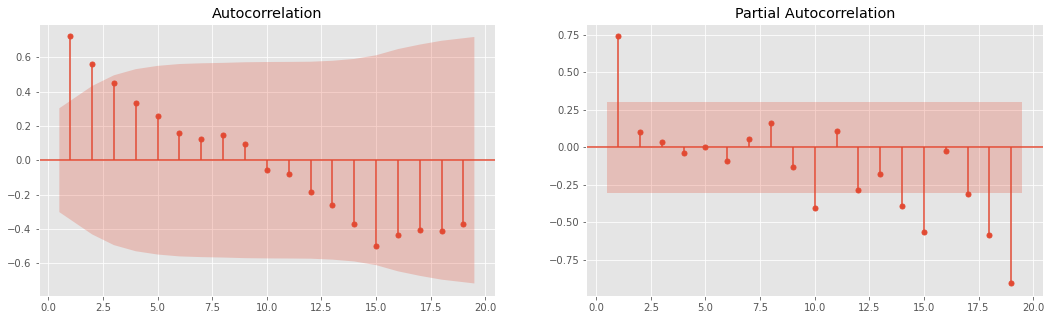

(-2.395256300115771,
 0.14307976168308484,
 0,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 477.92039057679585)

In [ ]:
plot_acf_pacf(sales_SON_066BF)
adfuller(sales_SON_066BF)

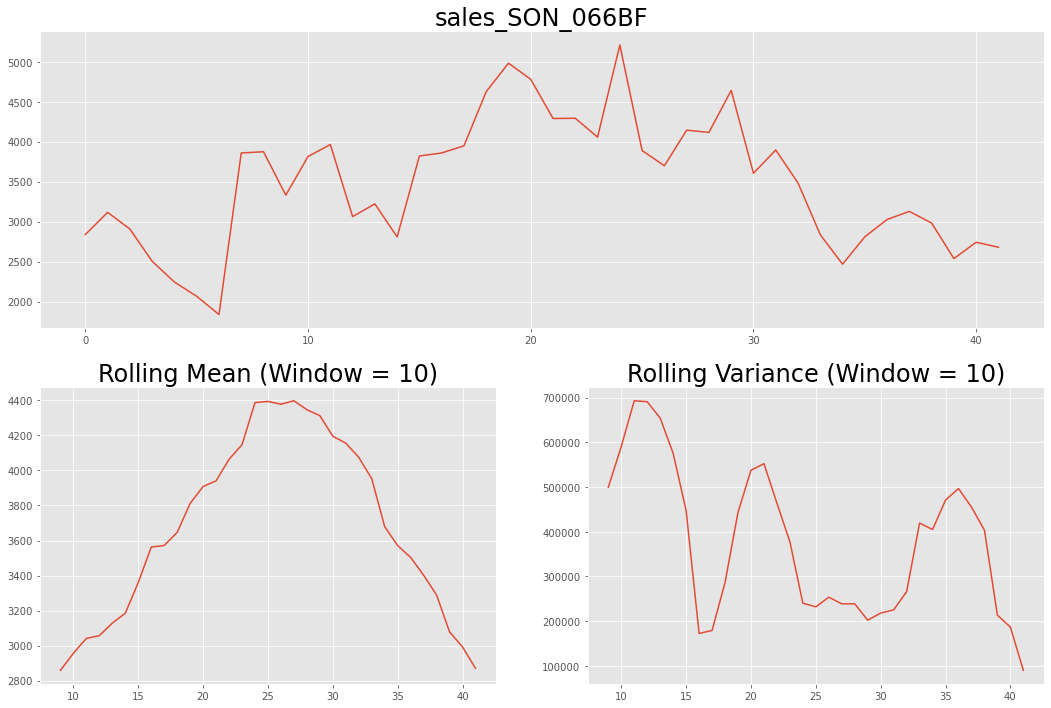

In [ ]:
rolling_mean = sales_SON_066BF.rolling(10).mean()
rolling_var = sales_SON_066BF.rolling(10).var()

plt.rcParams["figure.figsize"] = 18, 12

plt.subplot(2, 1, 1)
plt.plot(sales_SON_066BF)
plt.title("sales_SON_066BF", size = 24)

plt.subplot(2, 2, 3)
plt.plot(rolling_mean)
plt.title("Rolling Mean (Window = 10)", size = 24)

plt.subplot(2, 2, 4)
plt.plot(rolling_var)
plt.title("Rolling Variance (Window = 10)", size = 24)

plt.show()

From these plots its obvious that the mean and variance in the data varies with respect to time. The 3 transformation techniques listed above are applied in the following cells.

### Log Tranformation

$y\_new_t = \log(y_t)$

where, 
- $y\_new_t$: Transformed Series at time $t$
- $y_t$: Original Series at time $t$

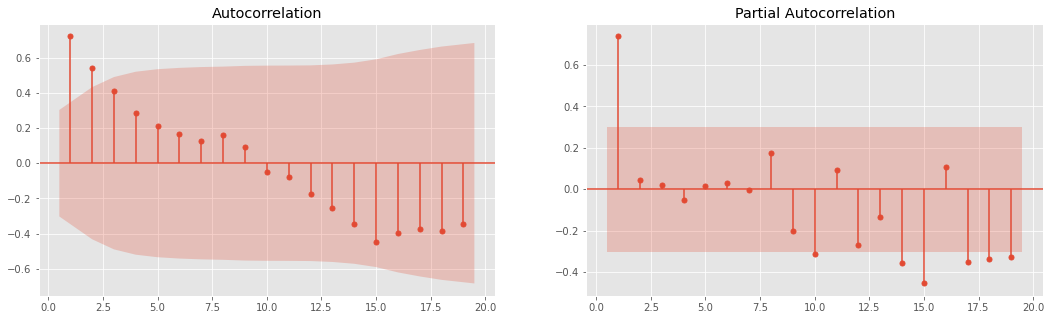

(-2.404533660724613,
 0.14046090304835546,
 0,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 -32.82089507503916)

In [ ]:
plot_acf_pacf(np.log(sales_SON_066BF.values))
adfuller(np.log(sales_SON_066BF.values))

Using the **Log Transform**, the non stationarity of the dataset could not be removed in this case.

### Differencing

$y\_new_t = y_t - y_{t-1}$

where, 
- $y\_new_t$: Transformed Series at time $t$
- $y_t$: Original Series at time $t$
- $y_{t-1}$: Original Series at time $t-1$

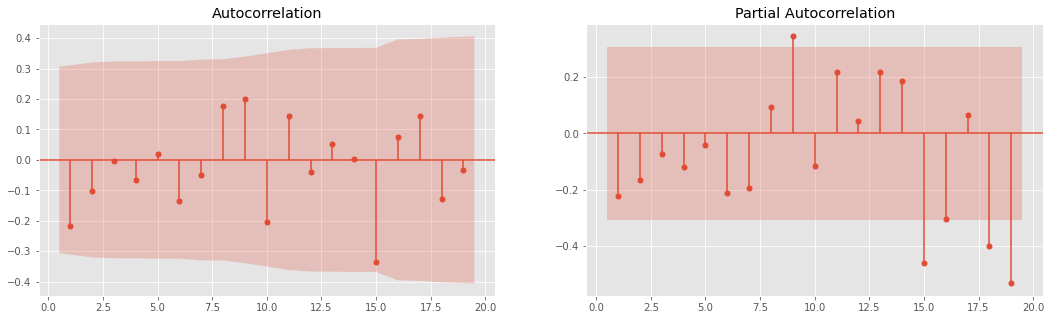

(-7.69653615035884,
 1.3745530975062768e-11,
 0,
 40,
 {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625},
 464.0702285141476)

In [ ]:
plot_acf_pacf(sales_SON_066BF.diff(1).dropna())
adfuller(sales_SON_066BF.diff(1).dropna())

**REVISAR** Clearly the series has been transformed to stationary. But since the variance of the series was also time dependent, transforming the data using **Log Transform** followed by **Differencing** seems ideal.

### Log Transform followed by Differencing

$y\_LT_t = \log(y_t)$<br>
$y\_LT_{t-1} = \log(y_{t-1})$

$y\_new_t = y\_LT_t - y\_LT_{t-1}$<br>
$y\_new_t = \log(y_t) - \log(y_{t-1})$

$\therefore y\_new_t = \log(y_t / y_{t-1})$

where,
- $y\_LT_t$: Log Transformed Series at time $t$
- $y\_LT_{t-1}$: Log Transformed Series at time $t-1$
- $y\_new_t$: Final Differenced Transformed Series at time $t$
- $y_t$: Original Series at time $t$
- $y_{t-1}$: Original Series at time $t-1$

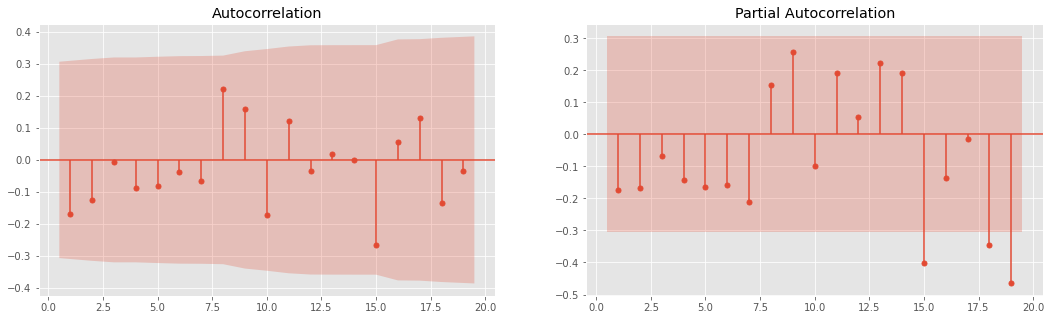

(-7.333358595219789,
 1.11284659727757e-10,
 0,
 40,
 {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625},
 -30.040502869191954)

In [ ]:
sales_log = pd.Series(np.log(sales_SON_066BF.values))
plot_acf_pacf(sales_log.diff(1).dropna())
adfuller(sales_log.diff(1).dropna())

### Conclusion
Revisando las distintas fajas, y analizando su correlación, es evidente que ninguna de sufre autocorrelación, pues tanto la gráfica de acf y pacf muestra que no presenta lags con una significancia estadística.

## Analisis de autocorrelacion de devoluciones


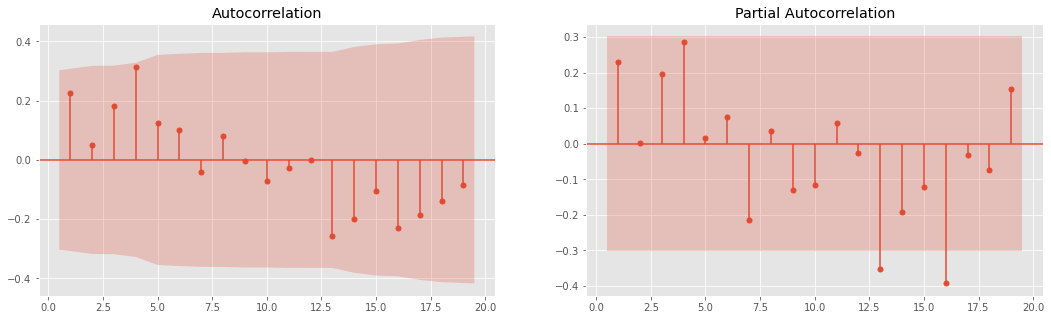

(-1.62355143233405,
 0.47086791391873,
 3,
 38,
 {'1%': -3.6155091011809297,
  '5%': -2.941262357486514,
  '10%': -2.6091995013850418},
 -152.38216401126562)

In [ ]:
plot_acf_pacf(devoluciones_SON_066BF)
adfuller(devoluciones_SON_066BF)

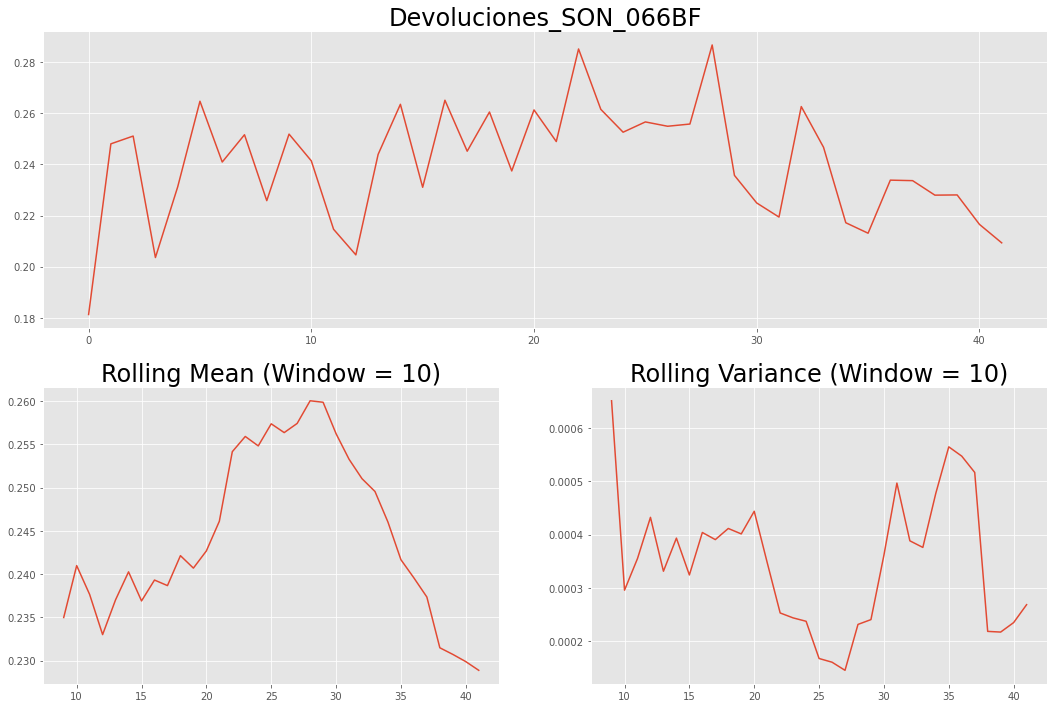

In [ ]:
rolling_mean = devoluciones_SON_066BF.rolling(10).mean()
rolling_var = devoluciones_SON_066BF.rolling(10).var()

plt.rcParams["figure.figsize"] = 18, 12

plt.subplot(2, 1, 1)
plt.plot(devoluciones_SON_066BF)
plt.title("Devoluciones_SON_066BF", size = 24)

plt.subplot(2, 2, 3)
plt.plot(rolling_mean)
plt.title("Rolling Mean (Window = 10)", size = 24)

plt.subplot(2, 2, 4)
plt.plot(rolling_var)
plt.title("Rolling Variance (Window = 10)", size = 24)

plt.show()

From these plots its obvious that the mean and variance in the data varies with respect to time. The 3 transformation techniques listed above are applied in the following cells.

### Log Tranformation

$y\_new_t = \log(y_t)$

where, 
- $y\_new_t$: Transformed Series at time $t$
- $y_t$: Original Series at time $t$

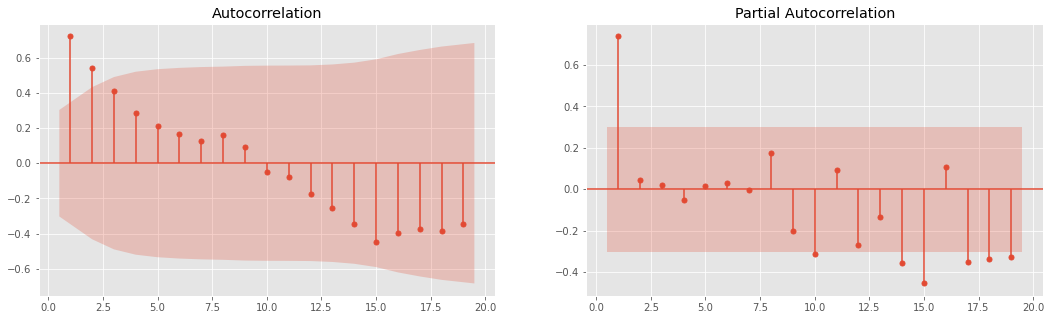

(-2.404533660724613,
 0.14046090304835546,
 0,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 -32.82089507503916)

In [ ]:
plot_acf_pacf(np.log(sales_SON_066BF.values))
adfuller(np.log(sales_SON_066BF.values))

Using the **Log Transform**, the non stationarity of the dataset could not be removed in this case.

### Differencing

$y\_new_t = y_t - y_{t-1}$

where, 
- $y\_new_t$: Transformed Series at time $t$
- $y_t$: Original Series at time $t$
- $y_{t-1}$: Original Series at time $t-1$

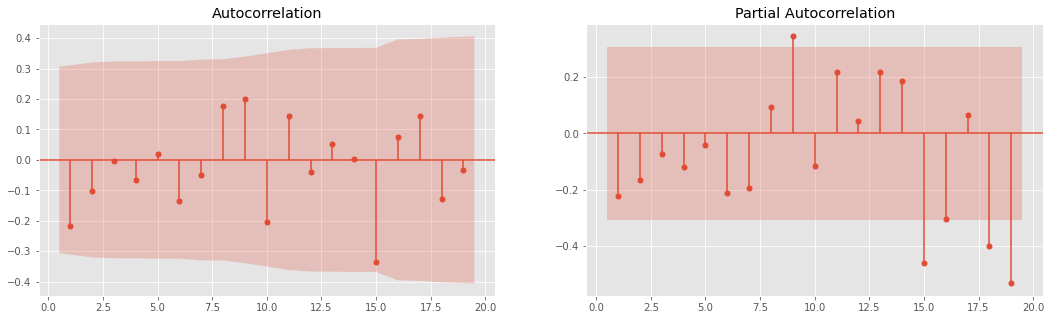

(-7.69653615035884,
 1.3745530975062768e-11,
 0,
 40,
 {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625},
 464.0702285141476)

In [ ]:
plot_acf_pacf(sales_SON_066BF.diff(1).dropna())
adfuller(sales_SON_066BF.diff(1).dropna())

**REVISAR** Clearly the series has been transformed to stationary. But since the variance of the series was also time dependent, transforming the data using **Log Transform** followed by **Differencing** seems ideal.

### Log Transform followed by Differencing

$y\_LT_t = \log(y_t)$<br>
$y\_LT_{t-1} = \log(y_{t-1})$

$y\_new_t = y\_LT_t - y\_LT_{t-1}$<br>
$y\_new_t = \log(y_t) - \log(y_{t-1})$

$\therefore y\_new_t = \log(y_t / y_{t-1})$

where,
- $y\_LT_t$: Log Transformed Series at time $t$
- $y\_LT_{t-1}$: Log Transformed Series at time $t-1$
- $y\_new_t$: Final Differenced Transformed Series at time $t$
- $y_t$: Original Series at time $t$
- $y_{t-1}$: Original Series at time $t-1$

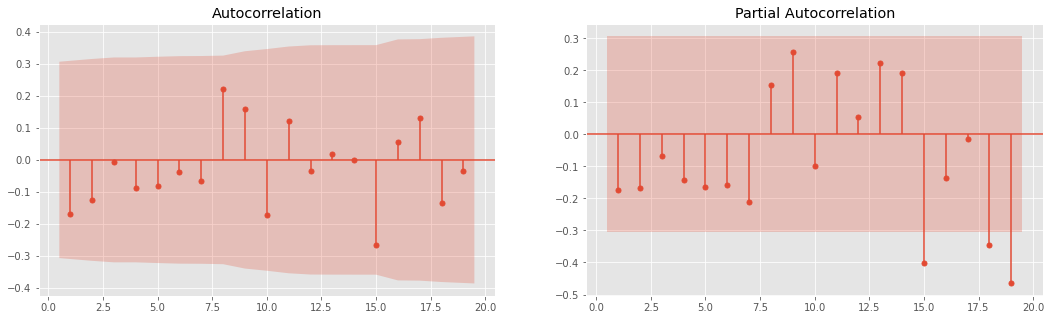

(-7.333358595219789,
 1.11284659727757e-10,
 0,
 40,
 {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625},
 -30.040502869191954)

In [ ]:
sales_log = pd.Series(np.log(sales_SON_066BF.values))
plot_acf_pacf(sales_log.diff(1).dropna())
adfuller(sales_log.diff(1).dropna())

### Conclusion
Revisando las distintas fajas, y analizando su correlación, es evidente que ninguna de sufre autocorrelación, pues tanto la gráfica de acf y pacf muestra que no presenta lags con una significancia estadística.

# Creando multiples modelos por cada faja - No sirve

In [41]:
def constraint(x):
    Const=1
    return Const-sum(x)


def objective(x):
    d1=[x[0]]
    d2=[x[1]]
    d3=[x[2]]
    d4=[x[3]]
    d5=[x[4]]
    #d6=[x[5]]
    
    val = pd.DataFrame()
    val["X1"]=d1
    val["X2"]=d2
    val["X3"]=d3
    val["X4"]=d4
    val["X5"]=d5
    #val["X6"]=d6
    y_est= model.predict(val)
    y=list(y_est)[0]
    return(y)


In [38]:
from sklearn import svm
import scipy
import random
from scipy.optimize import minimize


for i in range(len(dataframes)):
    y=dataframes[i].drop(['RETURN_MEAN', 'Referencia'],axis=1)
    # Creo los DataFrame de entrenamiento y evaluación
    X_train, X_test, y_train, y_test = train_test_split(y,dataframes[i]["RETURN_MEAN"] , train_size=0.8,random_state=123)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    info=dataframes[i].describe()
    
    b3=(0,  info.iloc[6][2]+(2*(info.iloc[6][2]-info.iloc[4][2])))
    b=(0,1)
    
    bnds=(b,b3,b,b,b)
    con1={"type":"eq","fun":constraint}
    
    x0=[0.2,0.2,0.2,0.2,0.2]
    
    sol= minimize(objective,x0,method="SLSQP",bounds=bnds,constraints=con1,options= {"maxiter":1000})
    pesos =list(sol.x)
    
    ##Ventas
    y=dataframes2[i]
    y=y.drop(['Ventas', 'Referencia'],axis=1)
    # Creo los DataFrame de entrenamiento y evaluación
    X_train2, X_test2, y_train2, y_test2 = train_test_split(y,dataframes2[i]["Ventas"] , train_size=0.8,random_state=123)
    model2 = svm.SVR()
    model2.fit(X_train2, y_train2)
    test=np.array(pesos).reshape(1,-1)
    ventas= model2.predict(test)
    
    ##Ventas
    
    
    y_opt=objective(pesos)
    
    print("")
    print("Return minimo para la referencia ",referencias[i],"es",y_opt,"vs el promedio de", dataframes[i]["RETURN_MEAN"].mean())
    print("")
    print("Con ventas de", ventas, "comparadas con el promedio de", float(dataframes2[i]["Ventas"].mean()))
    
    er = pd.DataFrame()
    y_est= model.predict(X_test)
    er["Return_Estimado"]=y_est
    er["Real_Real"]=list(y_test)

    er["c"]=(er["Return_Estimado"]-er["Real_Real"])**2
    er["d"]=(abs(er["Return_Estimado"]-er["Real_Real"]))


    MSE = er["c"].sum() / len(er["c"])
    RMSE = MSE**0.5
    MAE =  er["d"].sum() / len(er["d"])
    er["e"] = (er["Real_Real"] - np.mean(er["Real_Real"]))**2
    R2 = 1 - np.sum(er["c"]) / np.sum(er["e"])
    R2_sklearn = r2_score(y_test, y_est)
    print(f"R2 {R2}")
    print(f"R2 sklearn {R2_sklearn}")
    print("")
    print("MSE",MSE,"RMSE",RMSE,"MAE",MAE) #no idea de como maximizarlo
    


Return minimo para la referencia  LTR-21111 es 0.3010098014489955 vs el promedio de 0.3231911063072346

Con ventas de [675.90156544] comparadas con el promedio de 727.452380952381
R2 -0.45691973780873085
R2 sklearn -0.45691973780873085

MSE 0.002340588048030051 RMSE 0.048379624306416964 MAE 0.044074869333439834

Return minimo para la referencia  LTR-21113 es 0.33738738000701873 vs el promedio de 0.39116084344249863

Con ventas de [355.74460652] comparadas con el promedio de 404.23809523809524
R2 -0.8224576151420895
R2 sklearn -0.8224576151420895

MSE 0.0016114227333454908 RMSE 0.04014253023098433 MAE 0.03347142189198302

Return minimo para la referencia  SON-066BF es 0.21452765134167234 vs el promedio de 0.2402022579091998

Con ventas de [3698.27504276] comparadas con el promedio de 3477.190476190476
R2 -0.06934928793677231
R2 sklearn -0.06934928793677231

MSE 0.0004375580475519754 RMSE 0.020917888219224603 MAE 0.017533406405983484

Return minimo para la referencia  SON-PS-066 es 0.23

In [39]:
def nested_cross_validation(X, y, models: list, outer_n_splits=10, inner_n_splits=3, random_state=1):
    cv_outer = KFold(n_splits=outer_n_splits, shuffle=True, random_state=random_state)
    results = {}
    results_metrics = {}
    metrics = ["mse", "rmse", "r2", "mae"]
    for model in models:
        model["name"] = model["model"].__class__.__name__
        results[model["name"]] = dict(best_model_score = np.inf)
        results_metrics[model["name"]] = {metric: [] for metric in metrics}
    for train_ix, test_ix in cv_outer.split(X):
        X_train, X_test = X[train_ix, :], X[test_ix, :]
        y_train, y_test = y[train_ix], y[test_ix]
        cv_inner = KFold(n_splits=inner_n_splits, shuffle=True, random_state=random_state)
        for model in models:
            try:
                model["model"].set_params(**{"random_state": random_state})
            except:
                pass
            # define search
            search = RandomizedSearchCV(model["model"], 
                                               model["hyperparams_space"], 
                                               scoring='neg_mean_absolute_error', 
                                               cv=cv_inner, refit=True, n_jobs=-1)
            # execute search
            result = search.fit(X_train, y_train)
            # get the best performing model fit on the whole training set
            current_best_model = result.best_estimator_
            # evaluate model on the hold out dataset
            yhat = current_best_model.predict(X_test)
 
            # evaluate the model
            mse = mean_squared_error(y_test, yhat)
            mae = mean_absolute_error(y_test, yhat)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, yhat)

            # store the result
            results_metrics[model["name"]]["mae"].append(mae)
            results_metrics[model["name"]]["mse"].append(mse)
            results_metrics[model["name"]]["rmse"].append(rmse)
            results_metrics[model["name"]]["r2"].append(r2)
                
            if mae < results[model["name"]]["best_model_score"]:
                results[model["name"]]["best_model_score"] = mae
                results[model["name"]]["best_model_cfg"] = result.best_params_
                results[model["name"]]["best_model"] = current_best_model
            # report progress
            print(f'>{model["name"]} mae={mae:.4f} mse={mse:.4f}, rmse={rmse:.4f}, r2={r2} cfg={result.best_params_}')
        print()
       
        # summarize the estimated performance of the model and get the best one
        best_model_score = np.inf
        for model in models:
            current_metrics = results_metrics[model["name"]]["mae"]
            mean_current_metrics = np.mean(current_metrics)
            if mean_current_metrics < best_model_score:
                best_model_score = mean_current_metrics
                best_model_sd = np.std(current_metrics)
                best_model = results[model["name"]]["best_model"]
                best_model_cfg = results[model["name"]]["best_model_cfg"]
    table_result = pd.DataFrame(results)
    best_model_name = best_model.__class__.__name__
    print(f"El mejor modelo es: {best_model_name}")
    print(f"best_model_score MAE {best_model_score}")
    print(f"best_model_score STD {best_model_sd}")
    print(f"best_model selected r2  {results_metrics[best_model_name]['r2']}")
    print(f"best_model_cfg {best_model_cfg}")   
    for model in models:
        for metric in metrics:
            results_metrics[model["name"]][metric] = np.mean(results_metrics[model["name"]][metric])
    return best_model, pd.DataFrame(results_metrics)

In [40]:
from sklearn import svm
import scipy
import random
from scipy.optimize import minimize
from scipy.stats import reciprocal, uniform

random_state=142
total_results_returns = pd.DataFrame()
total_results_ventas = pd.DataFrame()
for i in range(len(dataframes)):
    X = dataframes[i].drop(['RETURN_MEAN', 'Referencia'],axis=1).to_numpy()
    y = dataframes[i]["RETURN_MEAN"].to_numpy()
    # Models to train
    forest_model = dict(model=RandomForestRegressor(), 
                        hyperparams_space=dict(n_estimators = [10, 100, 300],
                                               max_features= [2, 4, 6], 
                                               max_depth=[int(x) for x in np.linspace(2, 50, num = 10)]
                                              )
                       )
    lasso_model = dict(model=Lasso(), hyperparams_space=dict(alpha = np.linspace(0, 1, 20)))
    ridge_model = dict(model=Ridge(), hyperparams_space=dict(alpha = np.linspace(0, 1, 20)))
    svr_model = dict(model=svm.SVR(), hyperparams_space = {
        'kernel': ['rbf'],
        'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
        'C': [1, 10, 100, 1000, 10000]})
    xgb_model = dict(model=xgb.XGBRegressor(), hyperparams_space= {
        "n_estimators":[int(x) for x in np.linspace(start = 100, stop = 500, num = 10)],
        "max_depth": [int(x) for x in np.linspace(10, 110, num = 10)],
        "eta":[x for x in np.linspace(0, 1, num = 10)],
        "max_leaves": [int(x) for x in np.linspace(0, 110, num = 10)],
    })
    model, result_metrics = nested_cross_validation(X, y, [lasso_model, forest_model, ridge_model, svr_model, xgb_model])
    result_metrics["referencia"] = referencias[i]
    total_results_returns = pd.concat([total_results_returns, result_metrics])
    info=dataframes[i].describe()
    
    b3=(0,  info.iloc[6][2]+(2*(info.iloc[6][2]-info.iloc[4][2])))
    b=(0,1)
    
    bnds=(b,b3,b,b,b)
    con1={"type":"eq","fun":constraint}
    
    x0=[0.2,0.2,0.2,0.2,0.2]
    
    sol= minimize(objective,x0,method="SLSQP",bounds=bnds,constraints=con1,options= {"maxiter":1000})
    pesos =list(sol.x)
    
    ##Ventas
    y = dataframes2[i]["Ventas"].to_numpy()
    model2, result_metrics = nested_cross_validation(X, y, [lasso_model, forest_model, ridge_model, svr_model, xgb_model])
    result_metrics["referencia"] = referencias[i]
    total_results_ventas = pd.concat([total_results_ventas, result_metrics])  
    
    ##Ventas
    test=np.array(pesos).reshape(1,-1)
    ventas = model2.predict(test)

    y_opt=objective(pesos)

    
    print("")
    print("Return minimo para la referencia ",referencias[i],"es",y_opt,"vs el promedio de", dataframes[i]["RETURN_MEAN"].mean())
    print("")
    print("Con ventas de", ventas, "comparadas con el promedio de", float(dataframes2[i]["Ventas"].mean()))

>Lasso mae=0.0860 mse=0.0101, rmse=0.1003, r2=-0.3449504912813075 cfg={'alpha': 0.05263157894736842}
>RandomForestRegressor mae=0.0901 mse=0.0103, rmse=0.1015, r2=-0.37698142409860247 cfg={'n_estimators': 300, 'max_features': 4, 'max_depth': 2}
>Ridge mae=0.0890 mse=0.0105, rmse=0.1023, r2=-0.3978100725955518 cfg={'alpha': 0.9473684210526315}
>SVR mae=0.0867 mse=0.0098, rmse=0.0989, r2=-0.30847877293001824 cfg={'kernel': 'rbf', 'gamma': 0.0001, 'C': 100}
>XGBRegressor mae=0.1000 mse=0.0123, rmse=0.1109, r2=-0.6438425593301904 cfg={'n_estimators': 233, 'max_leaves': 61, 'max_depth': 87, 'eta': 0.4444444444444444}

>Lasso mae=0.0512 mse=0.0031, rmse=0.0555, r2=-0.016463052577496695 cfg={'alpha': 0.9473684210526315}
>RandomForestRegressor mae=0.0559 mse=0.0034, rmse=0.0586, r2=-0.1310136863450888 cfg={'n_estimators': 100, 'max_features': 2, 'max_depth': 2}
>Ridge mae=0.0526 mse=0.0032, rmse=0.0570, r2=-0.06876419950933155 cfg={'alpha': 1.0}
>SVR mae=0.0532 mse=0.0034, rmse=0.0580, r2=-0.1

In [42]:
total_results_returns = total_results_returns.set_index("referencia", append=True)

In [43]:
total_results_returns.index = total_results_returns.index.set_names(["metrics", "referencia"])
total_results_returns = total_results_returns.reorder_levels(['referencia', 'metrics']).sort_index()

In [44]:
pd.options.display.float_format = '{:,.3f}'.format
total_results_returns

Lasso  RandomForestRegressor  Ridge    SVR  XGBRegressor
referencia metrics                                                          
LTR-21111  mae      0.050                  0.059  0.054  0.053         0.079
           mse      0.004                  0.005  0.004  0.004         0.009
           r2      -0.766                 -1.536 -1.050 -1.128        -3.528
           rmse     0.058                  0.068  0.062  0.061         0.087
LTR-21113  mae      0.051                  0.055  0.052  0.054         0.063
           mse      0.004                  0.005  0.004  0.005         0.006
           r2      -0.663                 -0.940 -0.707 -0.899        -1.500
           rmse     0.061                  0.066  0.063  0.065         0.075
SON-053ZL  mae      0.021                  0.023  0.022  0.021         0.027
           mse      0.001                  0.001  0.001  0.001         0.001
           r2      -0.251                 -0.597 -0.432 -0.230        -1.287
           rmse     0.024                  0.026  0.025  0.024         0.031
SON-066BF  mae      0.018                  0.018  0.018  0.019         0.021
           mse      0.000                  0.000  0.000  0.001         0.001
           r2      -0.373                 -0.371 -0.261 -0.612        -1.144
           rmse     0.022                  0.022  0.021  0.023         0.026
SON-PS-066 mae      0.035                  0.040  0.038  0.043         0.051
           mse      0.003                  0.003  0.003  0.003         0.005
           r2      -0.271                 -0.696 -0.563 -1.802        -2.425
           rmse     0.044                  0.049  0.048  0.051         0.066

In [45]:
total_results_ventas = total_results_ventas.set_index("referencia", append=True)

In [46]:
total_results_ventas.index = total_results_ventas.index.set_names(["metrics", "referencia"])
total_results_ventas = total_results_ventas.reorder_levels(['referencia', 'metrics']).sort_index()

In [47]:
total_results_ventas

Lasso  RandomForestRegressor       Ridge         SVR  \
referencia metrics                                                              
LTR-21111  mae         303.363                279.155     296.900     256.901   
           mse     133,820.878            105,300.809 127,557.080 101,562.499   
           r2           -0.691                 -0.381      -0.626      -0.189   
           rmse        346.800                316.828     342.413     305.405   
LTR-21113  mae         159.969                144.489     151.119     146.116   
           mse      44,585.476             34,578.935  37,484.625  38,912.907   
           r2           -1.541                 -0.847      -1.007      -0.913   
           rmse        200.925                179.020     185.840     186.933   
SON-053ZL  mae         242.027                223.943     238.686     226.893   
           mse      88,830.780             80,036.030  84,185.834  76,418.216   
           r2           -0.984                 -0.955      -0.972      -0.944   
           rmse        273.791                250.888     270.338     259.986   
SON-066BF  mae         724.059                594.205     740.544     649.134   
           mse     915,547.695            585,761.446 909,969.631 664,439.666   
           r2           -1.086                 -0.072      -1.049      -0.332   
           rmse        897.617                712.728     892.854     776.246   
SON-PS-066 mae         265.029                258.236     245.342     225.970   
           mse     113,656.537            113,841.107  96,874.847  97,446.540   
           r2           -4.513                 -4.528      -5.872      -4.089   
           rmse        312.030                308.931     291.720     288.701   

                    XGBRegressor  
referencia metrics                
LTR-21111  mae           291.581  
           mse       120,336.305  
           r2             -0.682  
           rmse          340.673  
LTR-21113  mae           158.579  
           mse        43,123.393  
           r2             -1.461  
           rmse          197.643  
SON-053ZL  mae           264.743  
           mse       115,594.143  
           r2             -2.248  
           rmse          304.656  
SON-066BF  mae           694.879  
           mse       756,341.353  
           r2             -0.678  
           rmse          832.806  
SON-PS-066 mae           289.620  
           mse       130,866.302  
           r2            -11.407  
           rmse          332.800

# Analisis exploratorio

In [ ]:
df_Original.head(10)

In [ ]:
df_ventas_por_producto = df_Original.groupby(['REFERENCIA','FECHA'])['VENTAS'].sum()
df_ventas_por_producto = df_ventas_por_producto.reset_index()

In [ ]:
df_ventas_por_producto.head()

In [ ]:
import plotly.express as px
fig = px.line(df_ventas_por_producto, x="FECHA", y="VENTAS",
              color = "REFERENCIA",
              title='Evolución de la cantidad de ventas por producto')
fig.show()

In [ ]:
df_returns_por_producto = df_Original.groupby(['REFERENCIA','FECHA'])['RETURNS'].sum()
df_returns_por_producto = df_returns_por_producto.reset_index()

In [ ]:
df_returns_por_producto.head()

In [ ]:
import plotly.express as px
fig = px.line(df_returns_por_producto, x="FECHA", y="RETURNS",
              color = "REFERENCIA",
              title='Evolución de la cantidad de devoluciones por producto')
fig.show()

In [ ]:
df_ratio_devolucion_por_producto = df_Original.groupby(['REFERENCIA','FECHA'])['RETURNS', "VENTAS"].sum()
df_ratio_devolucion_por_producto = df_ratio_devolucion_por_producto.reset_index()
df_ratio_devolucion_por_producto["ratio"] = df_ratio_devolucion_por_producto["RETURNS"] / df_ratio_devolucion_por_producto["VENTAS"]

In [ ]:
import plotly.express as px
fig = px.line(df_ratio_devolucion_por_producto, x="FECHA", y="ratio",
              color = "REFERENCIA",
              title='Evolución de la proporcion de devoluciones por producto')
fig.show()